In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
import dtreeviz
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/blood_transfusion.csv')
X = df.drop('Class', axis=1)
y = df['Class']
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [64]:
clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

In [65]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

<Axes: >

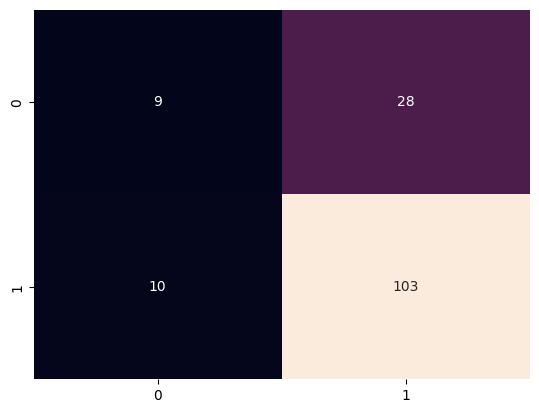

In [66]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True, fmt='d', cbar=False)

In [67]:
print(classification_report(ytest, ypred, target_names=target_encoder.classes_))

              precision    recall  f1-score   support

     donated       0.47      0.24      0.32        37
 not donated       0.79      0.91      0.84       113

    accuracy                           0.75       150
   macro avg       0.63      0.58      0.58       150
weighted avg       0.71      0.75      0.72       150



<Axes: xlabel='Class', ylabel='count'>

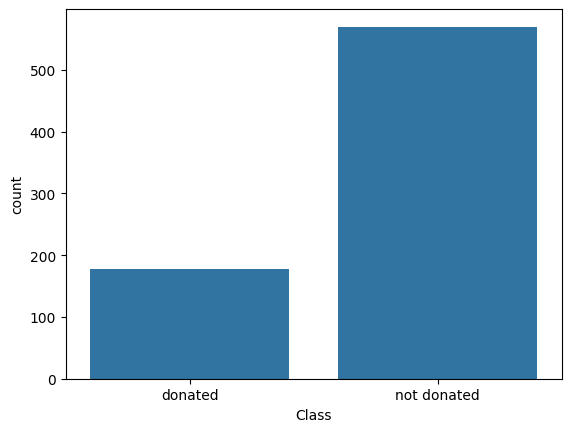

In [68]:
sns.countplot(x='Class', data=df)